<a id='top'></a>
## Exercise 6 Classification Tree

- <a href='#problem1'>Problem 1</a>
:  Predicting `CentralAir` using SalePrice

- <a href='#problem2'>Problem 2</a>
:  Predicting `CentralAir` using Other Variables

- <a href='#problem1Summary'>Problem 1 Summary</a>

- <a href='#problem2Summary'>Problem 2 Summary</a>

- <a href='#conclusion'>Conclusion</a>

- <a href='#bonus1'>Bonus1</a>

- <a href='#bonus2'>Bonus2</a>

- <a href='#bonus1Summary'>Bonus1 Summary</a>

- <a href='#bonus2Summary'>Bonus2 Summary</a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.tree import export_graphviz
import graphviz

sb.set()

### Helper Function
[Elucidated from here](https://scikit-learn.org/0.21/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

[and here](https://github.com/mwaskom/seaborn/issues/1773)

In [2]:
def analyze(y_true_list, y_pred_list, results, classes,
            title=None,
            cmap=plt.cm.Blues,
            figsize = (8, 6)):
    """
    This function prints and plots the confusion matrix.
    """        
    
    # set classes in correct order
    classes.reverse()

    for i in range(len(y_pred_list)):
        current_title = title.format(['Train', 'Test'][i])
        # Compute confusion matrix
        cm = confusion_matrix(y_true_list[i], y_pred_list[i])
        total_pos, total_neg = y_true_list[i]['CentralAir'].value_counts()
        print(total_pos, total_neg)
        results['ravel'].append(cm.ravel()) # (tn, fp, fn, tp)
        results['ravel_score'].append(np.round(cm.ravel() / 
                                               [total_neg, total_pos, total_neg, total_pos], 2))
        results['score'].append(np.round(accuracy_score(y_true_list[i], y_pred_list[i]), 2))

        with sb.axes_style('white'):
            fig, ax = plt.subplots(figsize = figsize)
            im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
            ax.figure.colorbar(im, ax=ax)
            # We want to show all ticks...
            ax.set(xticks=np.arange(cm.shape[1]),
                   yticks=np.arange(cm.shape[0]),
                   # ... and label them with the respective list entries
                   xticklabels=classes, yticklabels=classes,
                   title=current_title,
                   ylabel='True label',
                   xlabel='Predicted label')

            # Set tick label's their alignment.
            plt.setp(ax.get_xticklabels(), ha="right",
                     rotation_mode="anchor")

            # Loop over data dimensions and create text annotations.
            fmt = 'd'
            thresh = cm.max() / 2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),
                            ha="center", va="center",
                            color="white" if cm[i, j] > thresh else "black")
            fig.tight_layout()

            # fix for mpl bug that cuts off top/bottom of seaborn viz
            b, t = plt.ylim() # discover the values for bottom and top
            b += 0.5 # Add 0.5 to the bottom
            t -= 0.5 # Subtract 0.5 from the top
            plt.ylim(b, t) # update the ylim(bottom, top) values
            
    return results

<a id='problem1'></a>

### Problem 1
Predicting `CentralAir` using SalePrice

<a href='#top'>Back to Top</a>

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


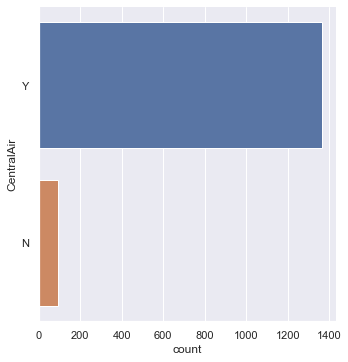

In [4]:
sb.catplot(y = "CentralAir", data = houseData, kind = "count")

In trying to minize loss and increase accuracy, model will predict `Y` for all values of `SalePrice`

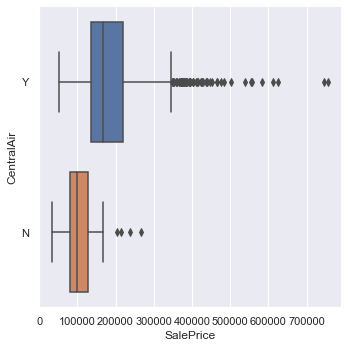

In [5]:
sb.catplot(x = 'SalePrice', y = 'CentralAir', data = houseData, kind = 'box')

The boxplot shows the difference in `median` between `CentralAir` and `SalePrice`. Low variance in `N` of `CentralAir` also suggests that the 2 levels can be distinguished easily.

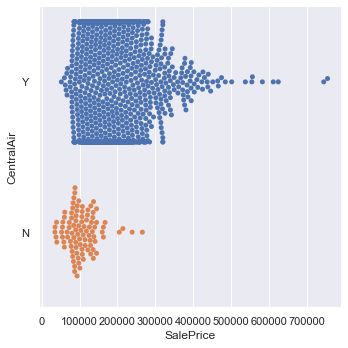

In [6]:
sb.catplot(x = 'SalePrice', y = 'CentralAir', data = houseData, kind = 'swarm')

There are many more sample in `Y` than `N` which may result in model not learning what constitutes a `N` vs a `Y`

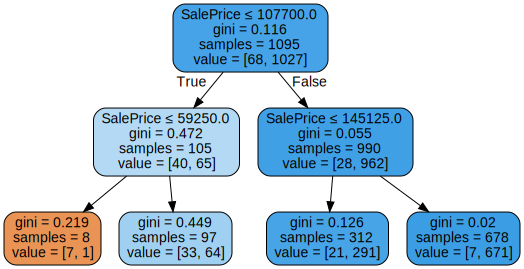

In [7]:
target = houseData['CentralAir']
feature = houseData['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.25,
                                                              random_state = 1)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

treedot = export_graphviz(dectree,
                          feature_names = X_train.columns,
                          out_file = None,
                          filled = True,
                          rounded = True,
                          special_characters = True)

graphviz.Source(treedot)

1027 68
338 27


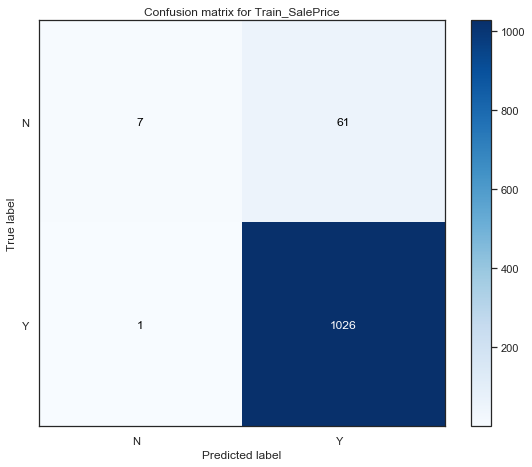

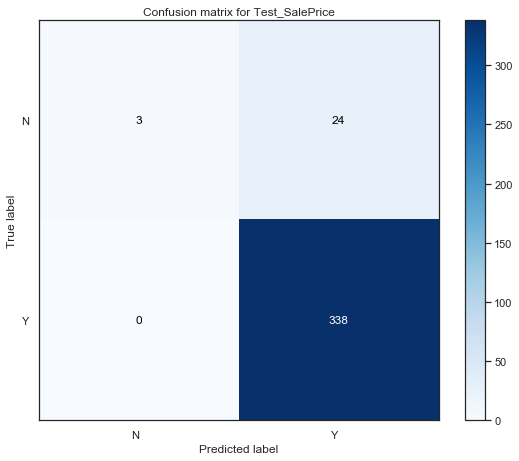

In [8]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

results = {'ravel': [], 
           'ravel_score': [],
           'score': []}

results = analyze([y_train, y_test], [y_train_pred, y_test_pred],
                  results,
                  classes = list(y_test['CentralAir'].unique()),
                  title = 'Confusion matrix for {}_SalePrice')

#### <a id='problem1Summary'></a>

Compiled for easier viewing

<a href='#top'>Back to Top</a>

In [9]:
names = ['Train_SalePrice', 'Test_SalePrice']
pd.DataFrame(list(zip(names, results['score'], results['ravel'],
                      results['ravel_score'])),
                      columns = ['Names', 'Classif Acc', 'TN, FP, FN, TP', 'Ratio to total N or Y'])

,Names,Classif Acc,"TN, FP, FN, TP",Ratio to total N or Y
0,Train_SalePrice,0.94,"[7, 61, 1, 1026]","[0.1, 0.06, 0.01, 1.0]"
1,Test_SalePrice,0.93,"[3, 24, 0, 338]","[0.11, 0.07, 0.0, 1.0]"


As mentioned, the model predicts `Y` for all values of `SalePrice` to get the highest accuracy. This is seen in the high `True Positives` and relatively more `False Positives` than `False Negatives` and `True Negatives` combined

<a id='problem2'></a>

### Problem 2
Predicting `CentralAir` using Other Variables

<a href='#top'>Back to Top</a>

1027 68
338 27
1027 68
338 27
1027 68
338 27


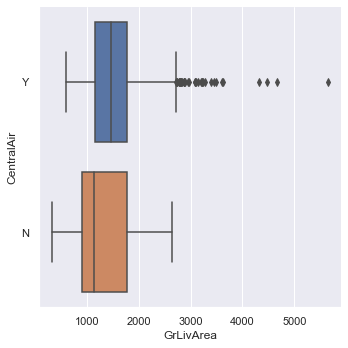

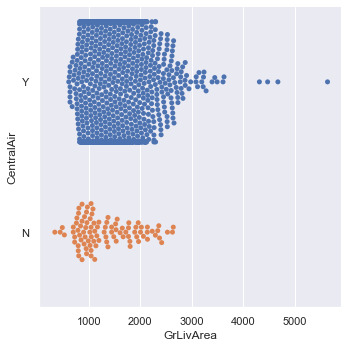

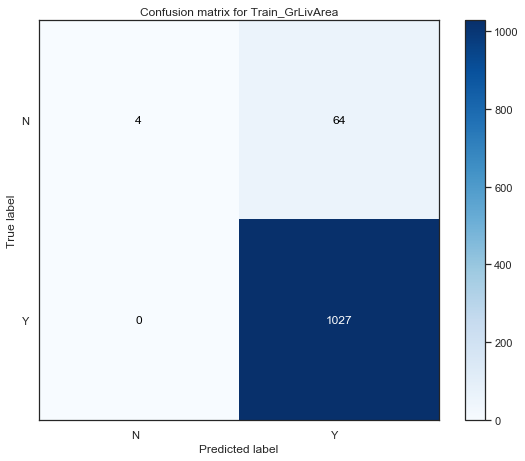

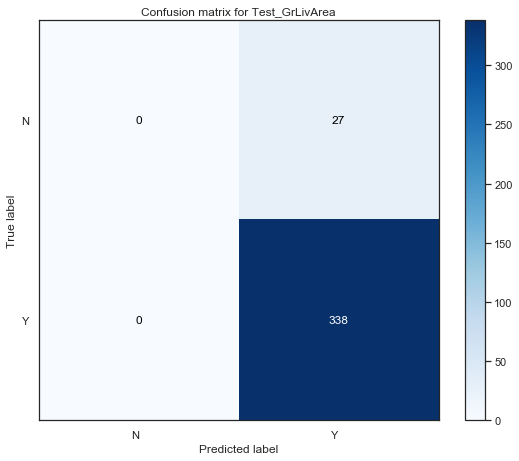

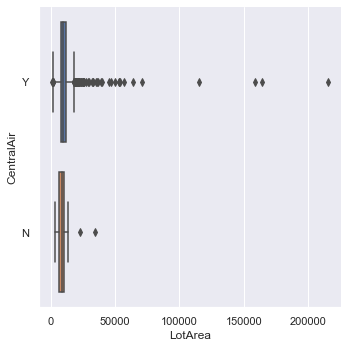

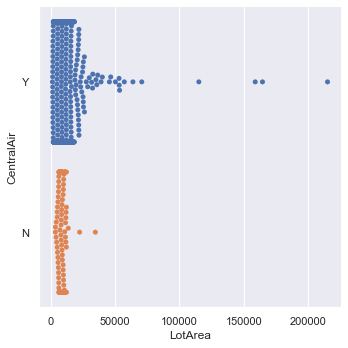

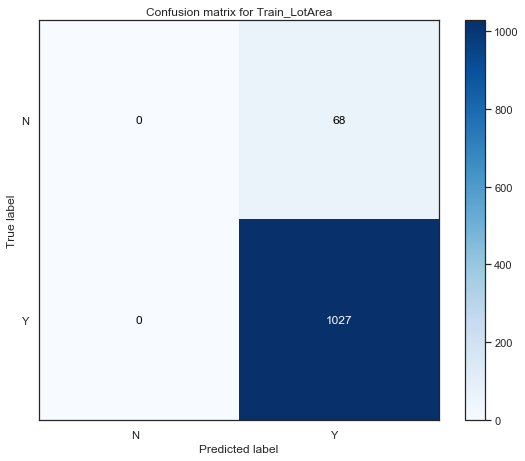

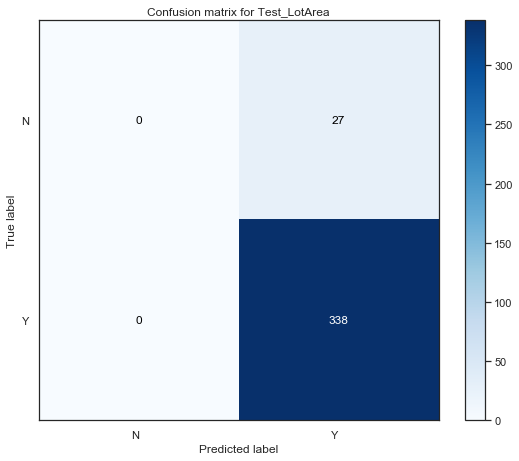

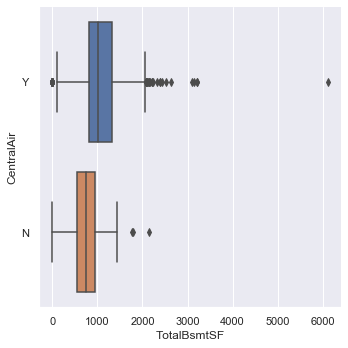

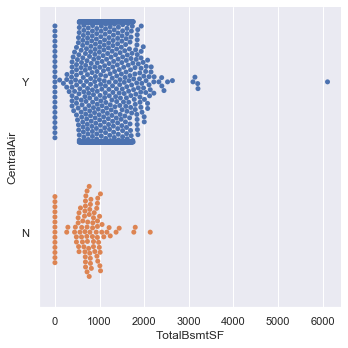

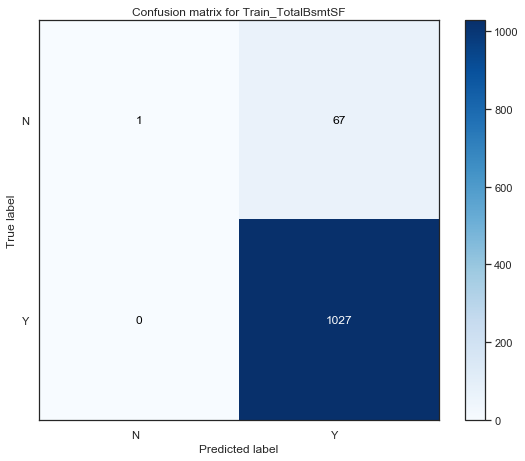

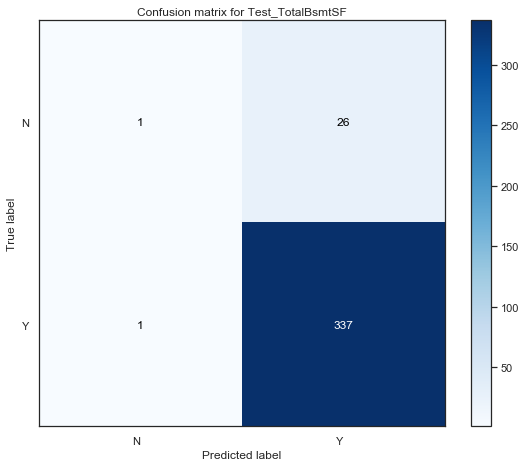

In [10]:
for feat in ['GrLivArea', 'LotArea', 'TotalBsmtSF']:
    sb.catplot(x = feat, y = 'CentralAir', data = houseData, kind = 'box')
    sb.catplot(x = feat, y = 'CentralAir', data = houseData, kind = 'swarm')

    target = houseData['CentralAir']
    feature = houseData[feat]

    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.25,
                                                              random_state = 1)
    names.append(f'Train_{feat}')
    names.append(f'Test_{feat}')
    
    X_train = pd.DataFrame(X_train)
    y_train = pd.DataFrame(y_train)
    X_test = pd.DataFrame(X_test)
    y_test = pd.DataFrame(y_test)

    dectree = DecisionTreeClassifier(max_depth = 2)
    dectree.fit(X_train, y_train)

    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)
    
    results = analyze(y_true_list = [y_train, y_test], y_pred_list = [y_train_pred, y_test_pred],
                      results = results,
                      classes = list(y_test['CentralAir'].unique()),
                      title = 'Confusion matrix for {}_{}'.format('{}', feat))

<a id='problem2Summary'></a>

Compiled for easier viewing

<a href='#top'>Back to Top</a>

In [11]:
pd.DataFrame(list(zip(names, results['score'], results['ravel'],
                      results['ravel_score'])),
                      columns = ['Names', 'Classif Acc', 'TN, FP, FN, TP', 'Ratio to total N or Y'])

,Names,Classif Acc,"TN, FP, FN, TP",Ratio to total N or Y
0,Train_SalePrice,0.94,"[7, 61, 1, 1026]","[0.1, 0.06, 0.01, 1.0]"
1,Test_SalePrice,0.93,"[3, 24, 0, 338]","[0.11, 0.07, 0.0, 1.0]"
2,Train_GrLivArea,0.94,"[4, 64, 0, 1027]","[0.06, 0.06, 0.0, 1.0]"
3,Test_GrLivArea,0.93,"[0, 27, 0, 338]","[0.0, 0.08, 0.0, 1.0]"
4,Train_LotArea,0.94,"[0, 68, 0, 1027]","[0.0, 0.07, 0.0, 1.0]"
5,Test_LotArea,0.93,"[0, 27, 0, 338]","[0.0, 0.08, 0.0, 1.0]"
6,Train_TotalBsmtSF,0.94,"[1, 67, 0, 1027]","[0.01, 0.07, 0.0, 1.0]"
7,Test_TotalBsmtSF,0.93,"[1, 26, 1, 337]","[0.04, 0.08, 0.04, 1.0]"


Due to the `target` having around `6.5%` of samples in `N` and the rest in `Y`, the univariate models cannot properly predict `N` given the respective features. As seen, every model chose to predict `Y` most of the time, making it seem like the model has learned to distinguish between `Y` and `N` very well when in fact it is blindly guessing `Y`

<a id='conclusion'></a>

### Conclusion

The best model would seem to be `SalePrice` as it has the highest `True Negative` and slightly lower `False Positive` suggesting it has learnt to distinguish slightly between `N` and `Y` a little better than other models.

## Bonus Problems

<a id='bonus1'></a>

### Bonus 1

<a href='#top'>Back to Top</a>

1027 68
338 27


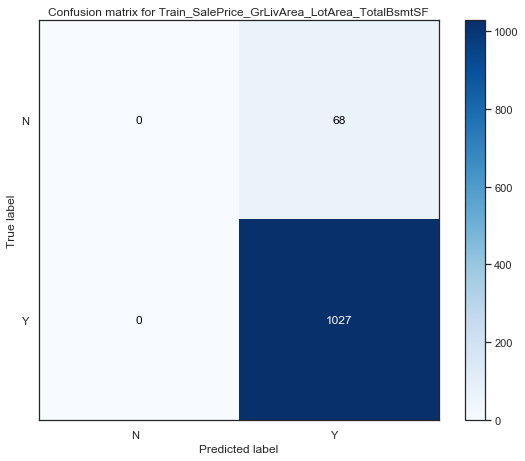

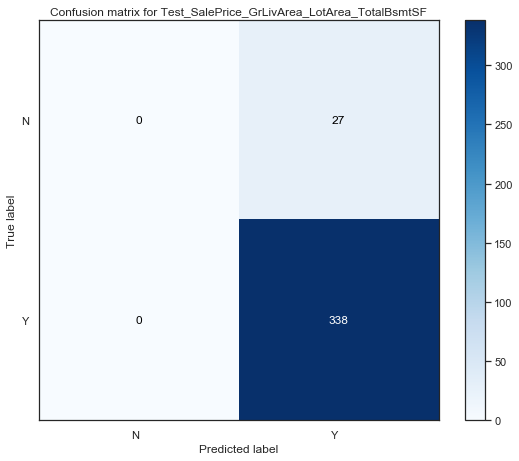

In [12]:
target = houseData['CentralAir']
features = houseData[['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25,
                                                          random_state = 1)
names.append('Train_All_4')
names.append('Test_All_4')

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

results = analyze(y_true_list = [y_train, y_test], y_pred_list = [y_train_pred, y_test_pred],
                  results = results,
                  classes = list(y_test['CentralAir'].unique()),
                  title = 'Confusion matrix for {}_SalePrice_GrLivArea_LotArea_TotalBsmtSF')

<a id='bonus1Summary'></a>

Compiled for easier viewing

<a href='#top'>Back to Top</a>

In [13]:
pd.DataFrame(list(zip(names, results['score'], results['ravel'],
                      results['ravel_score'])),
                      columns = ['Names', 'Classif Acc', 'TN, FP, FN, TP', 'Ratio to total N or Y'])

,Names,Classif Acc,"TN, FP, FN, TP",Ratio to total N or Y
0,Train_SalePrice,0.94,"[7, 61, 1, 1026]","[0.1, 0.06, 0.01, 1.0]"
1,Test_SalePrice,0.93,"[3, 24, 0, 338]","[0.11, 0.07, 0.0, 1.0]"
2,Train_GrLivArea,0.94,"[4, 64, 0, 1027]","[0.06, 0.06, 0.0, 1.0]"
3,Test_GrLivArea,0.93,"[0, 27, 0, 338]","[0.0, 0.08, 0.0, 1.0]"
4,Train_LotArea,0.94,"[0, 68, 0, 1027]","[0.0, 0.07, 0.0, 1.0]"
5,Test_LotArea,0.93,"[0, 27, 0, 338]","[0.0, 0.08, 0.0, 1.0]"
6,Train_TotalBsmtSF,0.94,"[1, 67, 0, 1027]","[0.01, 0.07, 0.0, 1.0]"
7,Test_TotalBsmtSF,0.93,"[1, 26, 1, 337]","[0.04, 0.08, 0.04, 1.0]"
8,Train_All_4,0.94,"[0, 68, 0, 1027]","[0.0, 0.07, 0.0, 1.0]"
9,Test_All_4,0.93,"[0, 27, 0, 338]","[0.0, 0.08, 0.0, 1.0]"


Using all four variables, `SalePrice`, `GrLivArea`, `LotArea`, `TotalBsmtSF` does not appear to increase the ability of the model to distinguish between `N` and `Y` as seen in the `0 True Negatives`.

<a id='bonus2'></a>

### Bonus 2

<a href='#top'>Back to Top</a>

In [14]:
numeric_features = ['LotArea', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                     '1stFlrSF', 'MasVnrArea', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                     'LowQualFinSF', 
                     'SalePrice']

C:\Users\Nicholas\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


1027 68
338 27


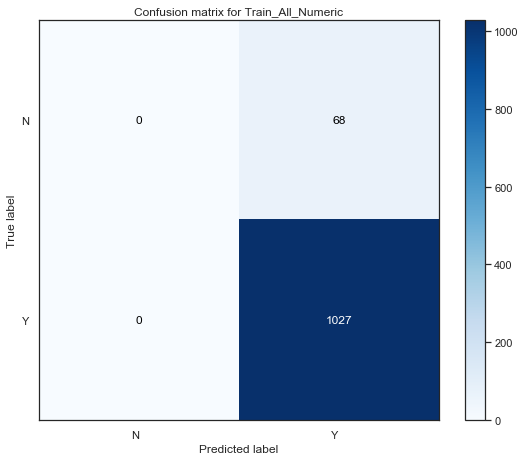

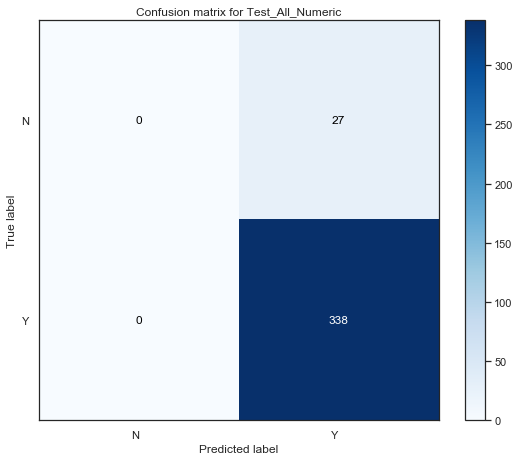

In [15]:
features = houseData[numeric_features]
# features.fillna(value = -999, inplace = True)
features.fillna(value = features.mean(), inplace = True)
target = houseData['CentralAir']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25,
                                                          random_state = 1)
names.append('Train_All_Numeric')
names.append('Test_All_Numeric')

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

results = analyze(y_true_list = [y_train, y_test], y_pred_list = [y_train_pred, y_test_pred],
                  results = results,
                  classes = list(y_test['CentralAir'].unique()),
                  title = 'Confusion matrix for {}_All_Numeric')

<a id='bonus2Summary'></a>

Compiled for easier viewing

<a href='#top'>Back to Top</a>

In [16]:
pd.DataFrame(list(zip(names, results['score'], results['ravel'],
                      results['ravel_score'])),
                      columns = ['Names', 'Classif Acc', 'TN, FP, FN, TP', 'Ratio to total N or Y'])

,Names,Classif Acc,"TN, FP, FN, TP",Ratio to total N or Y
0,Train_SalePrice,0.94,"[7, 61, 1, 1026]","[0.1, 0.06, 0.01, 1.0]"
1,Test_SalePrice,0.93,"[3, 24, 0, 338]","[0.11, 0.07, 0.0, 1.0]"
2,Train_GrLivArea,0.94,"[4, 64, 0, 1027]","[0.06, 0.06, 0.0, 1.0]"
3,Test_GrLivArea,0.93,"[0, 27, 0, 338]","[0.0, 0.08, 0.0, 1.0]"
4,Train_LotArea,0.94,"[0, 68, 0, 1027]","[0.0, 0.07, 0.0, 1.0]"
5,Test_LotArea,0.93,"[0, 27, 0, 338]","[0.0, 0.08, 0.0, 1.0]"
6,Train_TotalBsmtSF,0.94,"[1, 67, 0, 1027]","[0.01, 0.07, 0.0, 1.0]"
7,Test_TotalBsmtSF,0.93,"[1, 26, 1, 337]","[0.04, 0.08, 0.04, 1.0]"
8,Train_All_4,0.94,"[0, 68, 0, 1027]","[0.0, 0.07, 0.0, 1.0]"
9,Test_All_4,0.93,"[0, 27, 0, 338]","[0.0, 0.08, 0.0, 1.0]"


Similarly, using all numeric features does not improve `True Negatives`